In [1]:
text = "Truly Kryptic is the best puzzle game. It's browser-based and free. Google it."

In [2]:
from nltk import word_tokenize
text_tokenized=word_tokenize(text.lower())
text_tokenized

['truly',
 'kryptic',
 'is',
 'the',
 'best',
 'puzzle',
 'game',
 '.',
 'it',
 "'s",
 'browser-based',
 'and',
 'free',
 '.',
 'google',
 'it',
 '.']

In [4]:
from nltk.corpus import words
words.readme().replace('\n',' ')

'Wordlists  en: English, http://en.wikipedia.org/wiki/Words_(Unix) en-basic: 850 English words: C.K. Ogden in The ABC of Basic English (1932) '

In [5]:
words

<WordListCorpusReader in 'C:\\Users\\HP\\AppData\\Roaming\\nltk_data\\corpora\\words'>

In [8]:
words.fileids()

['en', 'en-basic']

In [7]:
words.words('en')[:10]

['A',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'Aani',
 'aardvark',
 'aardwolf',
 'Aaron']

In [10]:
 words.words('en-basic')[:10]

['I',
 'a',
 'able',
 'about',
 'account',
 'acid',
 'across',
 'act',
 'addition',
 'adjustment']

In [11]:
len(words.words('en'))

235886

In [12]:
len(words.words('en-basic'))

850

In [14]:
english_vocab=set(w.lower()for w in words.words())
text_vocab=set(w.lower() for w in text_tokenized if w.isalpha())
unusual=text_vocab.difference(english_vocab)
unusual

{'google'}

In [16]:
import nltk
text="the dogs are barking outside"
word=nltk.word_tokenize(text)
pos_tag=nltk.pos_tag(word)
print(pos_tag)

[('the', 'DT'), ('dogs', 'NNS'), ('are', 'VBP'), ('barking', 'VBG'), ('outside', 'IN')]


In [20]:
import nltk
text="who is Barrack Obama"
word=nltk.word_tokenize(text)
pos_tag=nltk.pos_tag(word)
chunk=nltk.ne_chunk(pos_tag)
NE=[" ".join(w for w,t in ele)for ele in chunk if isinstance(ele,nltk.Tree)]
print(NE)

['Barrack Obama']


In [22]:
text = "इराक के विदेश मंत्री ने अमरीका के उस प्रस्ताव का मजाक उड़ाया है , जिसमें अमरीका ने संयुक्त राष्ट्र के प्रतिबंधों को इराकी नागरिकों के लिए कम हानिकारक बनाने के लिए कहा है"

In [25]:
from nltk.tag import tnt
from nltk.corpus import indian
train_data=indian.tagged_sents('hindi.pos')
tnt_pos_tagger=tnt.TnT()
tnt_pos_tagger.train(train_data)

In [26]:
train_data

[[('पूर्ण', 'JJ'), ('प्रतिबंध', 'NN'), ('हटाओ', 'VFM'), (':', 'SYM'), ('इराक', 'NNP')], [('संयुक्त', 'NNC'), ('राष्ट्र', 'NN'), ('।', 'SYM')], ...]

In [27]:
docA="the cat sat on my face"
docB="the dog sat on my bed"
bowA=docA.split(" ")
bowB=docB.split(" ")
bowB

['the', 'dog', 'sat', 'on', 'my', 'bed']

In [29]:
wordSet=set(bowA).union(set(bowB))

In [30]:
wordSet

{'bed', 'cat', 'dog', 'face', 'my', 'on', 'sat', 'the'}

In [31]:
wordDictA=dict.fromkeys(wordSet,0)
wordDictB=dict.fromkeys(wordSet,0)


In [32]:
wordDictA

{'the': 0, 'sat': 0, 'cat': 0, 'dog': 0, 'my': 0, 'face': 0, 'on': 0, 'bed': 0}

In [33]:
for word in bowA:
    wordDictA[word]+=1
for word in bowB:
    wordDictB[word]+=1

In [34]:

wordDictA

{'the': 1, 'sat': 1, 'cat': 1, 'dog': 0, 'my': 1, 'face': 1, 'on': 1, 'bed': 0}

In [39]:
import pandas as pd
pd.DataFrame([wordDictA,wordDictB])

,bed,cat,dog,face,my,on,sat,the
0,0,1,0,1,1,1,1,1
1,1,0,1,0,1,1,1,1


In [44]:
def computeTF(wordDict,bow):
    tfDict={}
    bowCount=len(bow)
    for word,count in wordDict.items():
         tfDict[word]=count/float(bowCount)
    return tfDict

In [45]:
 tfBowA=computeTF(wordDictA,bowA)
tfBowB=computeTF(wordDictB,bowB)

In [47]:
tfBowA

{'the': 0.16666666666666666,
 'sat': 0.16666666666666666,
 'cat': 0.16666666666666666,
 'dog': 0.0,
 'my': 0.16666666666666666,
 'face': 0.16666666666666666,
 'on': 0.16666666666666666,
 'bed': 0.0}

In [48]:
tfBowB

{'the': 0.16666666666666666,
 'sat': 0.16666666666666666,
 'cat': 0.0,
 'dog': 0.16666666666666666,
 'my': 0.16666666666666666,
 'face': 0.0,
 'on': 0.16666666666666666,
 'bed': 0.16666666666666666}

In [51]:
def computeIDF(docList):
    import math
    idfdict={}
    N=len(docList)

    idfDict=dict.fromkeys(docList[0].keys(),0)
    for doc in docList:
        for word, val in doc.items():
            if val>0:
                idfDict[word]+=1
    for word, val in idfDict.items():
        idfDict[word]=math.log10(N/float(val))
    return idfDict

In [52]:
idfs=computeIDF([wordDictA,wordDictB])

In [55]:
def computeTFIDF(tfBow,idfs):
    tfidf={}
    for word,val in tfBow.items():
        tfidf[word]=val*idfs[word]
    return tfidf

In [56]:
tfidfBowA=computeTFIDF(tfBowA,idfs)
tfidfBowB=computeTFIDF(tfBowB,idfs)

In [57]:
tfidfBowA

{'the': 0.0,
 'sat': 0.0,
 'cat': 0.050171665943996864,
 'dog': 0.0,
 'my': 0.0,
 'face': 0.050171665943996864,
 'on': 0.0,
 'bed': 0.0}

In [58]:
tfidfBowB

{'the': 0.0,
 'sat': 0.0,
 'cat': 0.0,
 'dog': 0.050171665943996864,
 'my': 0.0,
 'face': 0.0,
 'on': 0.0,
 'bed': 0.050171665943996864}

In [60]:
import pandas as pd
pd.DataFrame([tfidfBowA,tfidfBowB])

,bed,cat,dog,face,my,on,sat,the
0,0.000000,0.050172,0.000000,0.050172,0.0,0.0,0.0,0.0
1,0.050172,0.000000,0.050172,0.000000,0.0,0.0,0.0,0.0


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
docA = "The car is driven on the road"
docB = "The truck is driven on the highway"

In [66]:
tfidf=TfidfVectorizer()

In [70]:
response=tfidf.fit_transform([docA,docB])
feature_names=tfidf.get_feature_names()
for col in response.nonzero()[1]:
    print(feature_names[col],'-',response[0,col])

the - 0.6043795515372431
car - 0.42471718586982765
is - 0.30218977576862155
driven - 0.30218977576862155
on - 0.30218977576862155
road - 0.42471718586982765
the - 0.6043795515372431
is - 0.30218977576862155
driven - 0.30218977576862155
on - 0.30218977576862155
truck - 0.0
highway - 0.0


In [74]:
messages=[line.rstrip() for line in open ('SMSSpamCollection')]
print(len(messages))

5574


In [75]:
for message_no,message in enumerate(messages[:10]):
    print(message_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [13]:
import pandas as pd
messages=pd.read_csv('SMSSpamCollection',names=["label","message"],sep='\t')
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [16]:
messages['length']=messages['message'].str.len()
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


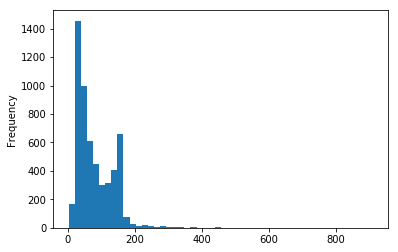

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
messages['length'].plot(bins=50,kind='hist')

In [19]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [21]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."